In [1]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /opt/anaconda3/lib/python3.8/site-packages (0.12.1)


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [189]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np
import math
import random

#Importing libraries for visualization
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

#Importing library for date manipulation
from datetime import datetime


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Data Manipulation

Open song_data.csv for data analysis

In [4]:
song_data = pd.read_csv('song_data.csv')
song_data.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [5]:
song_data.nunique()

song_id        999056
title          702428
release        149288
artist_name     72665
year               90
dtype: int64

In [6]:
song_data.shape

(1000000, 5)

In [7]:
song_data.count()

song_id        1000000
title           999985
release         999995
artist_name    1000000
year           1000000
dtype: int64

Total number of unique songs is 999056 and the number of entries is 1000000. This means that there are duplicate songs in this dataset. The duplicate entries needs to be dropped.

In [8]:
song_data = song_data.drop_duplicates(subset=['song_id'])
song_data.shape

(999056, 5)

In [9]:
song_data.count()

song_id        999056
title          999041
release        999051
artist_name    999056
year           999056
dtype: int64

Open count_data to read the count_data.csv file

In [10]:
user_data = pd.read_csv('count_data.csv')
user_data.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [11]:
user_data.nunique()

Unnamed: 0    2000000
user_id         76353
song_id         10000
play_count        295
dtype: int64

In [12]:
user_data.groupby(['user_id', 'song_id']).count()["play_count"].sum()

2000000

There are no duplicate entries of "'user_id', 'song_id'" combination in count_data.csv. We had to process the duplicate entries seperately(if there was any). Possible options, add the "play_count" or remove one of the entries.

In [13]:
user_data['song_id'].value_counts()

SOFRQTD12A81C233C0    8277
SOAUWYT12A81C206F1    7032
SOAXGDH12A8C13F8A1    6949
SOBONKR12A58A7A7E0    6412
SOSXLTC12AF72A7F54    6145
                      ... 
SOLIGVL12AB017DBAE      51
SOWNLZF12A58A79811      51
SOBPGWB12A6D4F7EF3      50
SOYYBJJ12AB017E9FD      48
SOGSPGJ12A8C134FAA      48
Name: song_id, Length: 10000, dtype: int64

SOFRQTD12A81C233C0 is the most popular song as it is listened by 8277 user_ids. But still there are 76353 - 8277 = 68076 users who have not listened to this song. With the recommendation system, we will try to recommend which users will listen to this song.

Also, out of 8277 users, we need to check the play_count as well to check if this song is listened repeatedly or just listened once and then not listened again. This will also give us clue on the song's liking or disliking.

In [14]:
user_data['user_id'].value_counts()

6d625c6557df84b60d90426c0116138b617b9449    711
fbee1c8ce1a346fa07d2ef648cec81117438b91f    643
4e11f45d732f4861772b2906f81a7d384552ad12    556
24b98f8ab023f6e7a1c37c7729c623f7b821eb95    540
1aa4fd215aadb160965110ed8a829745cde319eb    533
                                           ... 
6b43ce6fe46d98d1b53db22a8f1cd5421baedfbf      1
14d4e91285a59c12f4059afa4879043869473a9e      1
1f66493766a4c36f1ff435893896719adf13eb96      1
145d452a2b801b2249bbb8075ec60b11bbcd9b50      1
2d54a7c8f8c58658ce9e4c019049359a7c91ca88      1
Name: user_id, Length: 76353, dtype: int64

6d625c6557df84b60d90426c0116138b617b9449 user has listened to 711 songs. However we have 999056 songs. This user has not listened to 999056 - 711 = 998345 songs. The recommendation system we are coming up with will help recommend other songs to the user.

In [15]:
user_data1=user_data
user_data1.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


Adding three new columns to the user_data dataframe. This will help with Popularity based Recommendation system.
The idea here is:
1. Songs listened multiple times by few users may not be as much popular as the songs listened few times by many users. Example: One song listened by one user 1000 times may be less popular as compared to one song listened 2 times each by 50 users. 
2. We cannot use just number of interactions with song or total number of times a song is listened by all users to determine popularity. With just number of interactions, we may lose on the songs which are listened by sizeable amount of population but is listened many times. With Just total number of times a song is listened by all users we will lose on the songs which is listened by many users but just few times.
3. (total number of times song listened) * (total number of user interaction) Can be a new parameter which can be used to effectively recommend the songs.

Along with this, at later point the solution will introduce one more parameter to increase the effectiveness of popularity based recommendation system. Here is the idea for it:
1. If one song from an artist is popular, there is higher chance that other songs from the same artist can be popular as well.
2. Artist popularity index will be introduced as a new parameter, with this we can make the data(which is currently sparse) more dense. This will allow use to recommend more songs than what is currently interacted in the dataset so far.
3. Artist popularity index needs to be carefully used as it should not cause other songs which are actually popular(based on the user interactions) to lose on popularity.

In [16]:
user_data1["total_play_count"] = user_data1.groupby('song_id').play_count.transform('sum')
user_data1["interactions"]=user_data1.groupby('song_id').play_count.transform('count')
user_data1["product"]=user_data1["interactions"]*user_data1["total_play_count"]
user_data1.head()

,Unnamed: 0,user_id,song_id,play_count,total_play_count,interactions,product
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,496,194,96224
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,546,157,85722
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,4133,1082,4471906
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,1287,557,716859
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,2445,917,2242065


Merge user_data and count_data based on song_id. This is used to derive the artist_popularity_index, which will be used for popularity based recommendation.

Possible that one artist has sung 50 songs and lets say only 5 out of 50 are listened by 10 users lets say 1000 times. This means the songs from the specific artist is popular. but this will not imply that artist is popular. If there are more songs from Artist which are not interacted, then the artist will be less popular than other artists whose songs are interacted more.

We cannot make all the songs from a artist as popular as the songs which are already interacted. However we can say that the other songs not interacted can be popular but less that the ones which users have already interacted with.

Hence, here we will use following formula to derive the Artist_popularity_index:
Artist_popularity_index = Product/(total number of songs by artist)

Product = (total number of times song listened) * (total number of user interaction) 

In [17]:
combined_dataset = pd.merge(song_data, user_data1.drop_duplicates(['song_id']), on="song_id", how="left")

songs = combined_dataset['song_id'].unique()
combined_dataset=combined_dataset.fillna(0)
combined_dataset.head()

,song_id,title,release,artist_name,year,Unnamed: 0,user_id,play_count,total_play_count,interactions,product
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,0.0,0,0.0,0.0,0.0,0.0
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006,0.0,0,0.0,0.0,0.0,0.0
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003,0.0,0,0.0,0.0,0.0,0.0
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,0.0,0,0.0,0.0,0.0,0.0


Compute Artist popularity index
Artist_popularity_index = Product/(total number of songs by artist)

Product = (total number of times song listened) * (total number of user interaction) 

In [18]:
combined_dataset["artist_total_song_count"] = combined_dataset.groupby('artist_name').song_id.transform('count')
combined_dataset["artist_popularity_index"] = combined_dataset["total_play_count"]*combined_dataset["interactions"]/combined_dataset["artist_total_song_count"]

Using Artist_popularity_index to make the data more dense
Eariler we assumed that the non interacted songs from Artist can be popular as well. This is because if one sone from a artist is popular, there are higher chance that other songs from the artist will be popular as well.

Hence we can update artist_popularity_index for songs with max artist_popularity_index for the specific artist

In [19]:
combined_dataset["artist_popularity_index"]=combined_dataset.groupby("artist_name").artist_popularity_index.transform('max')
combined_dataset.head()

,song_id,title,release,artist_name,year,Unnamed: 0,user_id,play_count,total_play_count,interactions,product,artist_total_song_count,artist_popularity_index
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,0.0,0,0.0,0.0,0.0,0.0,1,0.00
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006,0.0,0,0.0,0.0,0.0,0.0,18,0.00
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003,0.0,0,0.0,0.0,0.0,0.0,50,0.00
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,0.0,0,0.0,0.0,0.0,0.0,1,0.00


From above output, we see that the artist_popularity_index is populated eventhough the song_id SOVFVAK12A8C1350D9 is not interacted. Total_play_count is 0 for this song.

However this song is interacted by other users. Total number of times the song is interacted is 93 and total play count is 404. Please note that the product(which will be used for popularity based recommendation later) is 37572, however there are multiple songs from the artist which is not interacted.

Hence the Artist_popularity index will be impacted a bit. In this case the artist_popularity_index comes out as 2348.25.

Please note that we have removed duplicate song_id in the combined_dataset earlier. Hence, combined_data_set will not show all the interactions. This was done becase we will use total_play_count and interactions here, which is same for all the interactions for a song.

In [20]:
combined_dataset[combined_dataset["artist_name"]=="Karkkiautomaatti"]

,song_id,title,release,artist_name,year,Unnamed: 0,user_id,play_count,total_play_count,interactions,product,artist_total_song_count,artist_popularity_index
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25
24464,SOTRFNA12A8C1350EA,Yeah yeah Jenni,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25
61194,SODUDXO12A8C1350C2,Äl-oo-vee,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25
86404,SOHJREX12A8C1346CE,Jää beibi jää,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25
244089,SOAGVPA12A8C1350DD,Takaisin en tuu,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25
302920,SOABHQH12A8C1346EA,Paina kaasua_ Honey,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25
304127,SOWUUXY12A8C1350C8,Ei oo ei oo toivokaa,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25
311573,SOQXHKF12A8C1346D2,Aina vaan jaa jaa jaa,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25
316402,SONLFZC12A8C1350E1,Annathan anteeks,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25
335923,SORQCXO12A8C1350D5,Taaskin turhaan,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25


In [21]:
combined_dataset.loc[combined_dataset["product"] != 0.0].count()

song_id                    10000
title                      10000
release                    10000
artist_name                10000
year                       10000
Unnamed: 0                 10000
user_id                    10000
play_count                 10000
total_play_count           10000
interactions               10000
product                    10000
artist_total_song_count    10000
artist_popularity_index    10000
dtype: int64

In [22]:
combined_dataset["product_art_popularity"]=combined_dataset["product"]
combined_dataset.head()

,song_id,title,release,artist_name,year,Unnamed: 0,user_id,play_count,total_play_count,interactions,product,artist_total_song_count,artist_popularity_index,product_art_popularity
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,0.0,0,0.0,0.0,0.0,0.0,1,0.00,0.0
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,0.0
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006,0.0,0,0.0,0.0,0.0,0.0,18,0.00,0.0
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003,0.0,0,0.0,0.0,0.0,0.0,50,0.00,0.0
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,0.0,0,0.0,0.0,0.0,0.0,1,0.00,0.0


At present we have 10269 songs which are not interacted by any users. We will see later on, how the artist_popularity_index makes the data denser.

Next we are going to make the data more dense by substituting "artist_popularity_index" in place of "product" for the songs which are not interacted(i.e. "product" is 0)

In [23]:
le = LabelEncoder()
combined_dataset.loc[combined_dataset['product_art_popularity'] == 0, 'product_art_popularity'] = combined_dataset["artist_popularity_index"]
#artist_popularity["popularity_index"]=artist_popularity["artist_user_interaction"]*artist_popularity["artist_total_play_count"]/artist_popularity["artist_total_song_count"]
combined_dataset['song_id'] = le.fit_transform(combined_dataset['song_id'])
combined_dataset.head()


,song_id,title,release,artist_name,year,Unnamed: 0,user_id,play_count,total_play_count,interactions,product,artist_total_song_count,artist_popularity_index,product_art_popularity
0,664054,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,0.0,0,0.0,0.0,0.0,0.0,1,0.00,0.00
1,834264,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,2348.25
2,286654,No One Could Ever,Butter,Hudson Mohawke,2006,0.0,0,0.0,0.0,0.0,0.0,18,0.00,0.00
3,66717,Si Vos Querés,De Culo,Yerba Brava,2003,0.0,0,0.0,0.0,0.0,0.0,50,0.00,0.00
4,324820,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,0.0,0,0.0,0.0,0.0,0.0,1,0.00,0.00


Lets check songs from artist "Karkkiautomaatti" and see if the product is updated.

In [24]:
combined_dataset.loc[combined_dataset["product_art_popularity"] != 0.0].count()

song_id                    141164
title                      141164
release                    141164
artist_name                141164
year                       141164
Unnamed: 0                 141164
user_id                    141164
play_count                 141164
total_play_count           141164
interactions               141164
product                    141164
artist_total_song_count    141164
artist_popularity_index    141164
product_art_popularity     141164
dtype: int64

In [25]:
combined_dataset.loc[combined_dataset["product"] != 0.0].count()

song_id                    10000
title                      10000
release                    10000
artist_name                10000
year                       10000
Unnamed: 0                 10000
user_id                    10000
play_count                 10000
total_play_count           10000
interactions               10000
product                    10000
artist_total_song_count    10000
artist_popularity_index    10000
product_art_popularity     10000
dtype: int64

As we can see, the number of songs for which product ==0 was 10269 and with the substitution of artist_popularity_index this has increased to 141164

In [26]:
combined_dataset[combined_dataset["artist_name"]=="Karkkiautomaatti"]

,song_id,title,release,artist_name,year,Unnamed: 0,user_id,play_count,total_play_count,interactions,product,artist_total_song_count,artist_popularity_index,product_art_popularity
1,834264,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,2348.25
24464,779184,Yeah yeah Jenni,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,2348.25
61194,162042,Äl-oo-vee,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,2348.25
86404,311611,Jää beibi jää,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,2348.25
244089,11616,Takaisin en tuu,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,2348.25
302920,2447,Paina kaasua_ Honey,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,2348.25
304127,889570,Ei oo ei oo toivokaa,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,2348.25
311573,679277,Aina vaan jaa jaa jaa,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,2348.25
316402,550186,Annathan anteeks,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,2348.25
335923,705510,Taaskin turhaan,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,2348.25


Product field of songs which are not interacted from artist "Karkkiautomaatti" is updated to 2348.25. hence these songs also will be recommeded to users based on the propularity(product)

In [27]:
combined_dataset.nunique()

song_id                    999056
title                      702351
release                    149212
artist_name                 72652
year                           90
Unnamed: 0                  10000
user_id                      1826
play_count                     65
total_play_count             1758
interactions                  825
product                      8528
artist_total_song_count       172
artist_popularity_index      3354
product_art_popularity      11435
dtype: int64

In [28]:
combined_dataset.head(5)

,song_id,title,release,artist_name,year,Unnamed: 0,user_id,play_count,total_play_count,interactions,product,artist_total_song_count,artist_popularity_index,product_art_popularity
0,664054,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,0.0,0,0.0,0.0,0.0,0.0,1,0.00,0.00
1,834264,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,2348.25
2,286654,No One Could Ever,Butter,Hudson Mohawke,2006,0.0,0,0.0,0.0,0.0,0.0,18,0.00,0.00
3,66717,Si Vos Querés,De Culo,Yerba Brava,2003,0.0,0,0.0,0.0,0.0,0.0,50,0.00,0.00
4,324820,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,0.0,0,0.0,0.0,0.0,0.0,1,0.00,0.00


In [29]:
song_data['song_id'] = le.fit_transform(song_data['song_id'])
user_data['user_id'] = le.fit_transform(user_data['user_id'])
user_data['song_id'] = le.fit_transform(user_data['song_id'])

In [30]:
count_interactions = user_data.groupby('song_id').count()['user_id']
count_interactions.head()

song_id
0     66
1    147
2     67
3     62
4    190
Name: user_id, dtype: int64

In [31]:
import matplotlib.pyplot as plt
count_interactions = user_data.groupby('user_id').count()['song_id']
user_data[user_data['song_id'] == 317]['play_count'].sum()

49253

# Popularity Based Recommendation system

For Rank based Recommendation system, the solution will use following methods to come up with recommendations:
1. Based on total play count
2. Based on Total number of user song interaction(number of users interacted with song)
3. Based on the product of #1 and #2
4. Based on the new dataframe derived earlier "combined_dataset" and use the product value

Create a new dataframe with total play count , Song/user interaction and product of total play count, Song/user interaction

In [32]:
#average_play_count = user_data.groupby('song_id').mean()['play_count']
count_play_sum = combined_dataset.groupby('song_id').sum()['total_play_count']
count_interactions = combined_dataset.groupby('song_id').sum()['interactions']
count_product = combined_dataset.groupby('song_id').sum()['product']
count_product_art_popularity = combined_dataset.groupby('song_id').sum()['product_art_popularity']
final_play_count1 = pd.DataFrame({'count_play_sum':count_play_sum, 'count_play_count':count_interactions, 'count_product':count_product, 'count_product_art_popularity':count_product_art_popularity})



In [33]:
final_play_count1=final_play_count1[final_play_count1["count_product_art_popularity"]!=0]
final_play_count1.head(5)

,count_play_sum,count_play_count,count_product,count_product_art_popularity
song_id,,,,
19,227.0,66.0,14982.0,14982.000000
52,0.0,0.0,0.0,520.000000
54,0.0,0.0,0.0,590.484375
57,0.0,0.0,0.0,4422.032258
75,0.0,0.0,0.0,22514.500000


In [34]:
final_play_count1.loc[52]

count_play_sum                    0.0
count_play_count                  0.0
count_product                     0.0
count_product_art_popularity    520.0
Name: 52, dtype: float64

In [35]:
final_play_count1.shape

(141164, 4)

**1: Popularity based recommendation system: Based on total play count

top_n_songs returns top n songs sorted based on the average play count

In [36]:
def top_n_songs_sum(data, n, min_interaction=100):
    recommendations = data[data['count_play_count'] > min_interaction]
    recommendations = recommendations.sort_values(by='count_play_sum', ascending=False)
    
    return recommendations.index[:n]

In [37]:
list(top_n_songs_sum(final_play_count1, 10, 50))

[67669, 35140, 751776, 181663, 241964, 38957, 569484, 638035, 798856, 831388]

In [38]:
final_play_count1.loc[67669]

count_play_sum                      54136.0
count_play_count                     6412.0
count_product                   347120032.0
count_product_art_popularity    347120032.0
Name: 67669, dtype: float64

List of top 10 songs with more than 50 interactions

In [39]:
list(top_n_songs_sum(final_play_count1, 10, 1000))

[67669, 35140, 751776, 181663, 241964, 38957, 569484, 638035, 798856, 831388]

List of top 10 songs with more than 100 interactions

**2: Popularity based recommendation system: Based on total play count

In [40]:
def top_n_songs_count(data, n, min_interaction=100):
    recommendations = data[data['count_play_count'] > min_interaction]
    recommendations = recommendations.sort_values(by='count_play_count', ascending=False)
    
    return recommendations.index[:n]

In [41]:
list(top_n_songs_count(final_play_count1, 10, 50))

[241964, 35140, 38957, 67669, 751776, 569484, 181663, 465378, 145294, 231976]

In [42]:
final_play_count1.loc[864745]

count_play_sum                     11070.0
count_play_count                    3976.0
count_product                   44014320.0
count_product_art_popularity    44014320.0
Name: 864745, dtype: float64

In [43]:
list(top_n_songs_count(final_play_count1, 10, 1000))

[241964, 35140, 38957, 67669, 751776, 569484, 181663, 465378, 145294, 231976]

**3: Popularity based recommendation system: Based on product 

In [44]:
def top_n_songs_product(data, n, min_interaction=100):
    recommendations = data[data['count_play_count'] > min_interaction]
    recommendations = recommendations.sort_values(by='count_product', ascending=False)
    
    return recommendations.index[:n]

In [45]:
list(top_n_songs_product(final_play_count1, 10, 50))

[67669, 35140, 241964, 751776, 38957, 181663, 569484, 638035, 145294, 465378]

In [46]:
final_play_count1.loc[145294]

count_play_sum                     15495.0
count_play_count                    4758.0
count_product                   73725210.0
count_product_art_popularity    73725210.0
Name: 145294, dtype: float64

In [47]:
list(top_n_songs_product(final_play_count1, 10, 1000))

[67669, 35140, 241964, 751776, 38957, 181663, 569484, 638035, 145294, 465378]

**4: Popularity based recommendation system: Based on product from "combined_dataset"

In [48]:
def top_n_songs_comb_product(data, n, min_interaction=0):
    recommendations = data[data['count_play_count'] >= min_interaction]
    recommendations = recommendations.sort_values(by='count_product_art_popularity', ascending=False)
    
    return recommendations.index[:n]

In [49]:
list(top_n_songs_comb_product(final_play_count1, 10, 50))

[67669, 35140, 241964, 751776, 38957, 181663, 569484, 638035, 145294, 465378]

In [50]:
list(top_n_songs_sum(final_play_count1, 10, 0))

[67669, 35140, 751776, 181663, 241964, 38957, 569484, 638035, 798856, 831388]

In [51]:
list(top_n_songs_count(final_play_count1, 10, 0))

[241964, 35140, 38957, 67669, 751776, 569484, 181663, 465378, 145294, 231976]

In [52]:
list(top_n_songs_product(final_play_count1, 10, 0))

[67669, 35140, 241964, 751776, 38957, 181663, 569484, 638035, 145294, 465378]

In [53]:
list(top_n_songs_comb_product(final_play_count1, 10, 0))

[67669, 35140, 241964, 751776, 38957, 181663, 569484, 638035, 145294, 465378]

In [54]:
final_play_count1.shape
final_play_count1.min()["count_product_art_popularity"]
final_play_count1[(final_play_count1["count_product"] == 0)].max()["count_product_art_popularity"]


10703540.5

In [55]:
songs1= list(top_n_songs_comb_product(final_play_count1, 80, 0))
songs1

[67669,
 35140,
 241964,
 751776,
 38957,
 181663,
 569484,
 638035,
 145294,
 465378,
 231976,
 326891,
 798856,
 580608,
 831388,
 68141,
 820777,
 786302,
 864745,
 816236,
 758772,
 434903,
 631739,
 66805,
 637105,
 722642,
 810079,
 482396,
 122206,
 140314,
 229762,
 642745,
 867192,
 632868,
 448222,
 104170,
 903922,
 786607,
 795804,
 557444,
 279160,
 926967,
 635843,
 473830,
 809238,
 5986,
 696129,
 798669,
 807050,
 546345,
 22906,
 505562,
 553948,
 784858,
 867314,
 466200,
 856202,
 610815,
 490971,
 992801,
 754412,
 304876,
 911877,
 498503,
 482377,
 545123,
 732741,
 919107,
 376604,
 139539,
 504861,
 376255,
 133294,
 968105,
 466412,
 23485,
 968604,
 634158,
 357551,
 341433]

In [56]:
final_play_count1.loc[968604]

count_play_sum                         0.0
count_play_count                       0.0
count_product                          0.0
count_product_art_popularity    10703540.5
Name: 968604, dtype: float64

After adding artist popularity index we see that the song id 968604(for which interaction count was 0) got recommended to the user

In [57]:
final_play_count1[(final_play_count1["count_product_art_popularity"] == 10703540.5)]


,count_play_sum,count_play_count,count_product,count_product_art_popularity
song_id,,,,
23485,0.0,0.0,0.0,10703540.5
224555,0.0,0.0,0.0,10703540.5
273090,0.0,0.0,0.0,10703540.5
319928,0.0,0.0,0.0,10703540.5
340745,0.0,0.0,0.0,10703540.5
341433,0.0,0.0,0.0,10703540.5
357551,0.0,0.0,0.0,10703540.5
419754,0.0,0.0,0.0,10703540.5
450218,0.0,0.0,0.0,10703540.5


# Collaborative Filtering Based Recommendation System

In [58]:
user_data_collab_filtering=user_data[user_data["interactions"]>500]

Create a new dataframe with song interactions > 500

In [59]:
user_data_collab_filtering.head()

,Unnamed: 0,user_id,song_id,play_count,total_play_count,interactions,product
2,2,54961,736,1,4133,1082,4471906
3,3,54961,750,1,1287,557,716859
4,4,54961,1188,1,2445,917,2242065
6,6,54961,1536,1,1198,527,631346
8,8,54961,2220,1,31036,8277,256884972


In [60]:
user_data_collab_filtering.shape

(559347, 7)

The new dataframe has 559347 users, the filtering has helped to reduce the size of dataframe considerably. This will make the collaborative filtering recommendation system faster.

In [61]:
user_data_collab_filtering.drop_duplicates()

,Unnamed: 0,user_id,song_id,play_count,total_play_count,interactions,product
2,2,54961,736,1,4133,1082,4471906
3,3,54961,750,1,1287,557,716859
4,4,54961,1188,1,2445,917,2242065
6,6,54961,1536,1,1198,527,631346
8,8,54961,2220,1,31036,8277,256884972
...,...,...,...,...,...,...,...
1999991,1999991,64590,3181,4,3196,1070,3419720
1999992,1999992,64590,3241,1,3396,1019,3460524
1999994,1999994,64590,3390,4,3117,618,1926306
1999997,1999997,64590,3744,3,3487,1013,3532331


In [62]:
user_data_collab_filtering.nunique()

Unnamed: 0          559347
user_id              65839
song_id                486
play_count             223
total_play_count       462
interactions           379
product                486
dtype: int64

Create the interaction matrix

In [63]:
interactions_matrix = user_data_collab_filtering.pivot(index='user_id', columns='song_id', values='play_count')
interactions_matrix

song_id,16,21,52,62,97,118,134,145,154,175,...,9724,9767,9771,9808,9835,9901,9931,9939,9942,9981
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
interactions_matrix.shape

(65839, 486)

In [65]:
interactions_matrix.isna().sum().min()

57562

In [66]:
interactions_matrix.isna().sum().max()

65336

Interaction matrix has 65839 users and 486 songs. minimum number of NaN for a song is 57562, maximum number of NaN for song is 65336. This indicates that the matrix is very sparse.

In [67]:
from sklearn.metrics.pairwise import cosine_similarity

Replace all cells having NaN with 0.0

In [68]:
interactions_matrix.fillna(0, inplace=True)
interactions_matrix.head()

song_id,16,21,52,62,97,118,134,145,154,175,...,9724,9767,9771,9808,9835,9901,9931,9939,9942,9981
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Function to find similar users

In [69]:
def similar_users(user_id, interactions_matrix):
    similarity = []
    for user in interactions_matrix.index:
        sim = cosine_similarity([interactions_matrix.loc[user_id]], [interactions_matrix.loc[user]])
        similarity.append((user, sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity]
    similarity_score = [tup[1] for tup in similarity]
    most_similar_users.remove(user_id)
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score



In [70]:
similar_users(8, interactions_matrix)[0][:10]

[51715, 1928, 2357, 9398, 10962, 12220, 12746, 13217, 14893, 14925]

Find 10 users similar to user id 8

In [71]:
similar_users(8, interactions_matrix)[1][:10]

[array([[0.72229645]]),
 array([[0.70710678]]),
 array([[0.70710678]]),
 array([[0.70710678]]),
 array([[0.70710678]]),
 array([[0.70710678]]),
 array([[0.70710678]]),
 array([[0.70710678]]),
 array([[0.70710678]]),
 array([[0.70710678]])]

Similarity index of 10 users similar to user 8.
Following function returns song recommendations based on the user similarity.

In [72]:
def recommendations(user_id, num_of_songs, interactions_matrix):
    most_similar_users = similar_users(user_id, interactions_matrix)[0]
    song_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_id] > 0)]))
    recommendations = []
    
    observed_interactions = song_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_songs:
            similar_user_song_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_song_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_song_ids)
        else:
            break
    
    return recommendations[:num_of_songs]

In [73]:
recommendations(2, 5, interactions_matrix)

[4806, 5272, 4727, 1752, 1787]

List of 5 songs recommended to user 2

# Matrix Factorization

In [74]:
u, s, vt = np.linalg.svd(interactions_matrix, full_matrices=False)

In [75]:
u.shape

(65839, 486)

In [76]:
s.shape

(486,)

In [77]:
vt.shape

(486, 486)

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(user_data_collab_filtering, test_size=0.2, random_state=42)

Divide the matrix into 80% train and 20% test. This will be used to find the optimum number of latent features

In [79]:
X_train.nunique()

Unnamed: 0          447477
user_id              63612
song_id                486
play_count             216
total_play_count       462
interactions           379
product                486
dtype: int64

In [80]:
X_train.shape

(447477, 7)

In [81]:
interactions_matrix_train = X_train.pivot(index='user_id', columns='song_id', values='play_count')
interactions_matrix_train.fillna(0, inplace=True)

In [82]:
interactions_matrix_train.shape

(63612, 486)

In [83]:
interactions_matrix_test = X_test.pivot(index='user_id', columns='song_id', values='play_count')
interactions_matrix_test.fillna(0, inplace=True)

In [84]:
interactions_matrix_test.shape

(42308, 486)

In [85]:
train_idx = set(interactions_matrix_train.index)
test_idx = set(interactions_matrix_test.index)
match_idx = train_idx.intersection(test_idx)
    
train_songs = set(interactions_matrix_train.columns)
test_songs = set(interactions_matrix_test.columns)
match_cols = train_songs.intersection(test_songs)

interactions_matrix_test = interactions_matrix_test.loc[match_idx, match_cols]

In [86]:
interactions_matrix_test.shape

(40081, 486)

In [87]:
u_train, s_train, vt_train = np.linalg.svd(interactions_matrix_train, full_matrices=False)

In [88]:
row_idxs = interactions_matrix_train.index.isin(test_idx)
col_idxs = interactions_matrix_train.columns.isin(test_songs)
u_test = u_train[row_idxs, :]
vt_test = vt_train[:, col_idxs]



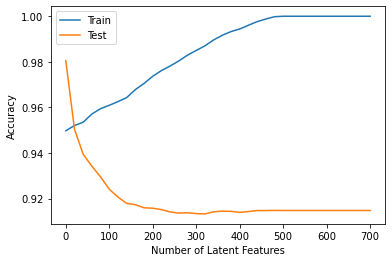

In [89]:
latent_features = np.arange(0, 700+10, 20)
train_error = []
test_error = []

for k in latent_features:
    s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]
    
    interactions_matrix_train_preds = np.around(np.dot(np.dot(u_train_lat, s_train_lat), vt_train_lat))
    interactions_matrix_test_preds = np.around(np.dot(np.dot(u_test_lat, s_train_lat), vt_test_lat))
    
    train_difference = np.subtract(interactions_matrix_train, interactions_matrix_train_preds)
    test_difference = np.subtract(interactions_matrix_test, interactions_matrix_test_preds)
    
    error_train = np.sum(np.sum(np.abs(train_difference)))
    error_test = np.sum(np.sum(np.abs(test_difference)))
    
    train_error.append(error_train)
    test_error.append(error_test)
    
    
plt.plot(latent_features, 1 - np.array(train_error)/(interactions_matrix_train.shape[0]*interactions_matrix_test.shape[1]), label='Train');
plt.plot(latent_features, 1 - np.array(test_error)/(interactions_matrix_test.shape[0]*interactions_matrix_test.shape[1]), label='Test');
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.legend();

From above graph, we can take 300 as the optimum number of latent feature.
Now lets get the prediction matrix for train and test with latent features as 300. The pred matrix can be used to measure the error in prediction

In [90]:
s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:300]), u_train[:, :300], vt_train[:300, :]
u_test_lat, vt_test_lat = u_test[:, :300], vt_test[:300, :]

In [91]:
interactions_matrix_train_preds = np.around(np.dot(np.dot(u_train_lat, s_train_lat), vt_train_lat))
interactions_matrix_test_preds = np.around(np.dot(np.dot(u_test_lat, s_train_lat), vt_test_lat))


In [92]:
interactions_matrix_train

song_id,16,21,52,62,97,118,134,145,154,175,...,9724,9767,9771,9808,9835,9901,9931,9939,9942,9981
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
pd.DataFrame(interactions_matrix_train_preds, index=interactions_matrix_train.index, columns=interactions_matrix_train.columns)

song_id,16,21,52,62,97,118,134,145,154,175,...,9724,9767,9771,9808,9835,9901,9931,9939,9942,9981
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
2,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
4,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0
6,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76348,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
76349,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
76350,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0


In [94]:
interactions_matrix_test

song_id,2048,16,21,6175,4134,2091,6189,2098,52,8247,...,8131,8134,6089,1994,8138,6103,4058,6114,2019,2047
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76346,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
pd.DataFrame(interactions_matrix_test_preds, index=interactions_matrix_test.index, columns=interactions_matrix_test.columns)

song_id,2048,16,21,6175,4134,2091,6189,2098,52,8247,...,8131,8134,6089,1994,8138,6103,4058,6114,2019,2047
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
8,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,...,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
10,0.0,0.0,-0.0,-1.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,...,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0
11,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
12,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76344,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
76345,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
76346,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,...,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0


In [96]:
from scipy.sparse.linalg import svds # for sparse matrices
# Singular Value Decomposition
U, sigma, Vt = svds(interactions_matrix, k = 300)  
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [97]:
interactions_matrix.shape

(65839, 486)

In [98]:
U.shape

(65839, 300)

In [99]:
sigma.shape

(300, 300)

In [100]:
Vt.shape

(300, 486)

In [101]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Create a dataframe of predicted ratings (all_user_predicted_ratings) by using the columns from interactions_matrix
preds_df = pd.DataFrame(all_user_predicted_ratings,index=interactions_matrix.index, columns=interactions_matrix.columns)
preds_df.head()


song_id,16,21,52,62,97,118,134,145,154,175,...,9724,9767,9771,9808,9835,9901,9931,9939,9942,9981
user_id,,,,,,,,,,,,,,,,,,,,,
0,-0.000712,0.012742,0.009706,0.064027,-0.007594,0.013749,-0.003679,0.057180,-0.014813,-0.036768,...,-0.017736,0.000860,-0.006350,0.045154,-0.008929,0.009194,0.016009,0.068374,-0.018551,0.078017
2,0.001219,-0.015047,0.002901,-0.025512,0.003149,0.006525,0.001745,-0.010866,0.008973,-0.021697,...,-0.003625,-0.017053,0.049054,0.009695,-0.001168,0.027356,-0.002553,-0.000042,-0.010649,-0.004657
3,0.004727,-0.008403,-0.047722,-0.056079,0.014371,-0.048906,0.002203,0.011399,0.001865,-0.028292,...,0.040354,-0.003394,-0.005949,-0.120990,-0.001829,0.288877,-0.018421,0.014837,-0.015797,-0.032066
4,-0.000329,-0.000614,0.008215,0.020004,-0.005465,-0.011967,-0.001040,-0.000161,-0.010493,0.030422,...,-0.002385,0.013969,0.010079,-0.001835,0.000242,0.022829,-0.015007,-0.003652,-0.001901,0.986243
6,0.001834,-0.017855,0.004708,-0.005478,-0.009410,-0.005665,-0.005583,-0.004559,-0.003839,-0.009531,...,0.036033,-0.002665,0.002462,0.005205,-0.000655,-0.006063,-0.001500,-0.007559,-0.004177,-0.003196


In [172]:
def recommend_items(user_index, interactions_matrix, preds_df, num_recommendations):
      
    user_idx = user_index-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = interactions_matrix.loc[user_index].sort_values()  #sorted_user_ratings
    
    sorted_user_predictions = preds_df.loc[user_index].sort_values()   #sorted_user_predictions
    

    #Concatenate the sorted user ratings and sorted user predictions with the axis 1
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_index = {}):\n'.format(user_index))
    return temp.head(num_recommendations)

In [173]:
user_index = 10
num_recommendations = 5
test=recommend_items(user_index, interactions_matrix, preds_df, num_recommendations)
test.head(num_recommendations)

song_list=test.index.tolist()
song_list


Below are the recommended items for user(user_index = 10):



[4423, 4289, 7321, 3857, 5122]

# Testing the Model

In [104]:
interactions_matrix.head()

song_id,16,21,52,62,97,118,134,145,154,175,...,9724,9767,9771,9808,9835,9901,9931,9939,9942,9981
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
average_act_rating  = interactions_matrix.loc[:, :].mean()
average_act_rating

song_id
16      0.026428
21      0.035207
52      0.101657
62      0.037531
97      0.077887
          ...   
9901    0.022783
9931    0.088686
9939    0.036483
9942    0.116071
9981    0.043880
Length: 486, dtype: float64

In [106]:
preds_df.head()

song_id,16,21,52,62,97,118,134,145,154,175,...,9724,9767,9771,9808,9835,9901,9931,9939,9942,9981
user_id,,,,,,,,,,,,,,,,,,,,,
0,-0.000712,0.012742,0.009706,0.064027,-0.007594,0.013749,-0.003679,0.057180,-0.014813,-0.036768,...,-0.017736,0.000860,-0.006350,0.045154,-0.008929,0.009194,0.016009,0.068374,-0.018551,0.078017
2,0.001219,-0.015047,0.002901,-0.025512,0.003149,0.006525,0.001745,-0.010866,0.008973,-0.021697,...,-0.003625,-0.017053,0.049054,0.009695,-0.001168,0.027356,-0.002553,-0.000042,-0.010649,-0.004657
3,0.004727,-0.008403,-0.047722,-0.056079,0.014371,-0.048906,0.002203,0.011399,0.001865,-0.028292,...,0.040354,-0.003394,-0.005949,-0.120990,-0.001829,0.288877,-0.018421,0.014837,-0.015797,-0.032066
4,-0.000329,-0.000614,0.008215,0.020004,-0.005465,-0.011967,-0.001040,-0.000161,-0.010493,0.030422,...,-0.002385,0.013969,0.010079,-0.001835,0.000242,0.022829,-0.015007,-0.003652,-0.001901,0.986243
6,0.001834,-0.017855,0.004708,-0.005478,-0.009410,-0.005665,-0.005583,-0.004559,-0.003839,-0.009531,...,0.036033,-0.002665,0.002462,0.005205,-0.000655,-0.006063,-0.001500,-0.007559,-0.004177,-0.003196


In [107]:
avg_pred_rating = preds_df.loc[:, :].mean()
avg_pred_rating

song_id
16      0.023353
21      0.034548
52      0.101618
62      0.035479
97      0.075837
          ...   
9901    0.016970
9931    0.086284
9939    0.035582
9942    0.117261
9981    0.045620
Length: 486, dtype: float64

In [108]:
#creating a dataframe containing average actual ratings and avearge predicted ratings based on the items
rmse_df = pd.concat([average_act_rating, avg_pred_rating], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(486, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
song_id,,,
16,0.026428,0.023353,0
21,0.035207,0.034548,1
52,0.101657,0.101618,2
62,0.037531,0.035479,3
97,0.077887,0.075837,4


In [109]:
RMSE = np.sqrt(((rmse_df["Avg_actual_ratings"] - rmse_df["Avg_predicted_ratings"]) ** 2).mean())
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.002766023208346334 



# Final Solution

In [206]:
def recommend_items1(user_index, num_recommendations, min_interaction):
    collab_filter = math.floor(num_recommendations*70/100)
    if user_data_collab_filtering[user_data_collab_filtering["user_id"]==user_index].index.tolist():
        result = recommend_items(user_index, interactions_matrix, preds_df, collab_filter)
        final_reco=result.index.tolist()
        final_reco = final_reco + list(top_n_songs_sum(final_play_count1, num_recommendations-collab_filter, min_interaction))
        #random.shuffle(final_reco)
        return final_reco
    else:
        result = list(top_n_songs_sum(final_play_count1, num_recommendations, min_interaction))
        return result
    


In [133]:
i=10*5/7
math.floor(i)

7

In [148]:
recommend_items(2, interactions_matrix, preds_df, 10)



Below are the recommended items for user(user_index = 2):

                   user_ratings  user_predictions
Recommended Items                                
8494                        0.0          0.245809
4588                        0.0          0.081542
2869                        0.0          0.074532
1752                        0.0          0.073860
5886                        0.0          0.072891
5599                        0.0          0.069911
4743                        0.0          0.064528
3232                        0.0          0.061611
8093                        0.0          0.057610
5616                        0.0          0.051945


In [214]:
recommend_items1(3, 10, 100)



Below are the recommended items for user(user_index = 3):



[6726, 2500, 9901, 3770, 2276, 8099, 4767, 67669, 35140, 751776]

User id 3 is existing user, hence we use model based collaborative filtering to come up with 5 recommended songs for user id 3

In [215]:
recommend_items1(80000, 10, 100)

[67669, 35140, 751776, 181663, 241964, 38957, 569484, 638035, 798856, 831388]

User id 80000 is a new user, hence we use popularity based recommendation system for user id 80000

In [113]:
user_data.head()

,Unnamed: 0,user_id,song_id,play_count,total_play_count,interactions,product
0,0,54961,153,1,496,194,96224
1,1,54961,413,2,546,157,85722
2,2,54961,736,1,4133,1082,4471906
3,3,54961,750,1,1287,557,716859
4,4,54961,1188,1,2445,917,2242065


In [116]:
combined_dataset.head()

,song_id,title,release,artist_name,year,Unnamed: 0,user_id,play_count,total_play_count,interactions,product,artist_total_song_count,artist_popularity_index,product_art_popularity
0,664054,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,0.0,0,0.0,0.0,0.0,0.0,1,0.00,0.00
1,834264,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,0.0,0,0.0,0.0,0.0,0.0,16,2348.25,2348.25
2,286654,No One Could Ever,Butter,Hudson Mohawke,2006,0.0,0,0.0,0.0,0.0,0.0,18,0.00,0.00
3,66717,Si Vos Querés,De Culo,Yerba Brava,2003,0.0,0,0.0,0.0,0.0,0.0,50,0.00,0.00
4,324820,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,0.0,0,0.0,0.0,0.0,0.0,1,0.00,0.00


In [122]:
test=combined_dataset[combined_dataset["artist_name"]=="Karkkiautomaatti"].max()

In [127]:
test["song_id"]

889570